#### 1. Data understanding

In [2]:
# ! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# ! pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/85/6dff36f75ed9707f65fbd15832d599e2ebec6962d2e52fbbfba22c2df088/scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl.metadata
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/fd/a7/5f829b100d208c85163aecba93faf01d088d944fc91585338751d812f1e4/scipy-1.12.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 456.4 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [10]:
# ! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/6d/c8/46d355b3c2d04881ce745c667eba6b08ea2215a1ccae875c64b725c3d348/statsmodels-0.14.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
Using cached statsmodels-0.14.1-cp310-cp310-win_amd64.whl (9.8 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import math
import statsmodels.api as sm

In [12]:
health_care_df = pd.read_csv('datasets/healthcare_dataset.csv')
health_care_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [15]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [22]:
# change 'Date of Admission' and 'Discharge Date' to datetime
for date in ['Date of Admission' and 'Discharge Date']:
    health_care_df[date] = pd.to_datetime(health_care_df[date])
health_care_df[date].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Discharge Date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [25]:
health_care_df['Date of Admission'] = pd.to_datetime(health_care_df['Date of Admission'])
health_care_df['Day Hospitalized'] = (health_care_df['Discharge Date'] - health_care_df['Date of Admission']).dt.days
health_care_df['Day Hospitalized'] = health_care_df['Day Hospitalized'].astype(int)
health_care_df['Day Hospitalized'] # calculate day that patient admitted

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Day Hospitalized, Length: 10000, dtype: int32

In [26]:
health_care_df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Day Hospitalized'],
      dtype='object')

In [27]:
# drop columns that not relate to analysis

health_care_df = health_care_df.drop(columns=['Name','Date of Admission','Discharge Date','Room Number'])
health_care_df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Day Hospitalized'],
      dtype='object')

In [28]:
print(health_care_df.shape)
health_care_df.head()

(10000, 12)


,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Day Hospitalized
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


#### 2. Exploratory Data Analysis (EDA)

In [33]:
frequency_table_cond = health_care_df['Medical Condition'].value_counts()
frequency_table_cond

Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

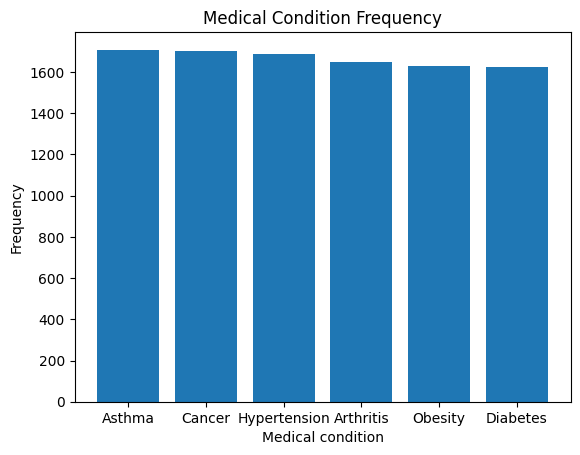

Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


In [34]:
plt.bar(frequency_table_cond.index,frequency_table_cond.values)
plt.title('Medical Condition Frequency')
plt.xlabel('Medical condition')
plt.ylabel('Frequency')
# plt.xticks(rotation=90)
plt.show()
print(frequency_table_cond)

In [35]:
frequency_table_type = health_care_df['Admission Type'].value_counts()
print(frequency_table_type)

Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


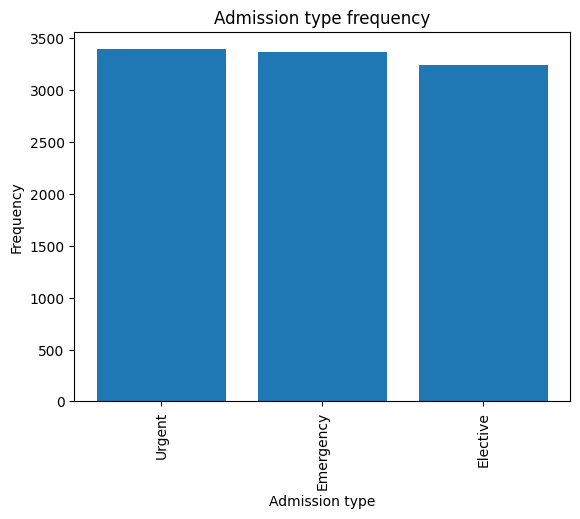

Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


In [38]:
plt.bar(frequency_table_type.index, frequency_table_type.values)
plt.title('Admission type frequency')
plt.xlabel('Admission type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()
print(frequency_table_type)

In [45]:
frequency_table_doctor = health_care_df['Doctor'].value_counts()[:20]
print(frequency_table_doctor)

Doctor
Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
James Williams       5
James Perez          5
Michael Smith        5
David Johnson        4
Christopher Davis    4
Robert Miller        4
William Rodriguez    4
Christopher Jones    4
Michael Brown        4
Ashley Jackson       4
Jessica Johnson      3
Joshua Smith         3
James Sanchez        3
Jennifer Jones       3
Joseph Morales       3
Name: count, dtype: int64


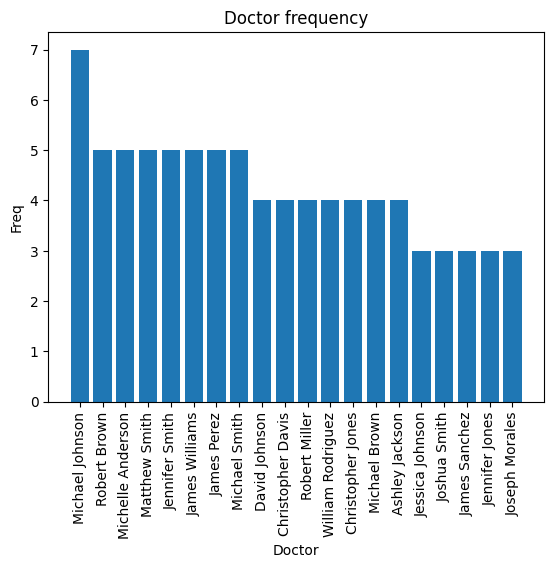

In [48]:
plt.bar(frequency_table_doctor.index,frequency_table_doctor.values)
plt.title('Doctor frequency')
plt.xlabel('Doctor')
plt.ylabel('Freq')
plt.xticks(rotation=90)
plt.show()

#### 2.1. Histogram

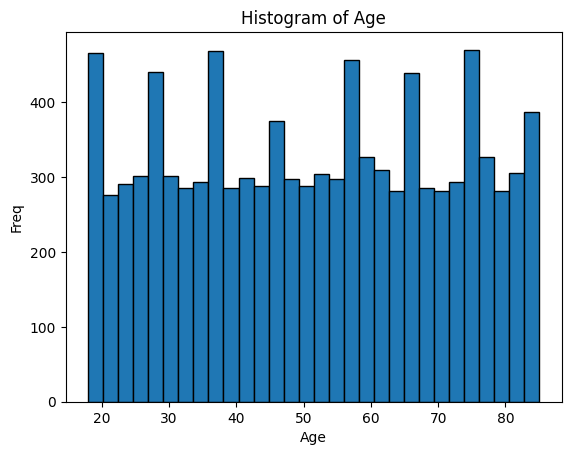

In [54]:
plt.hist(health_care_df['Age'],bins=30,edgecolor='black') # bins=30 means this hist will show 30 bars

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

#### 2.2. Seaborn Boxplot

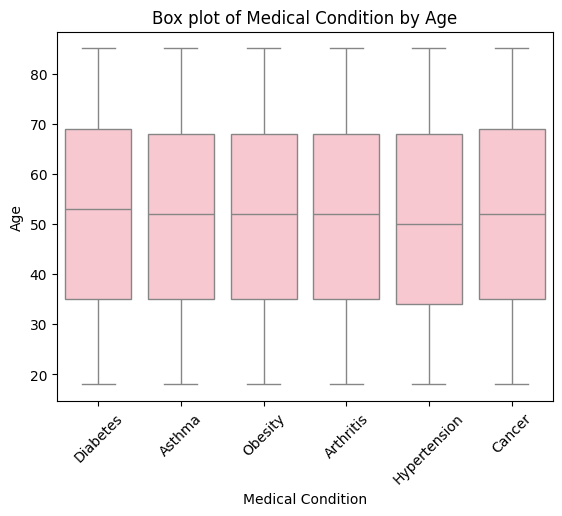

In [51]:
sns.boxplot(data=health_care_df, x='Medical Condition', y='Age', color='Pink')
plt.title('Box plot of Medical Condition by Age')
plt.xticks(rotation=45)
plt.show()

#### 2.3. Scatter plot

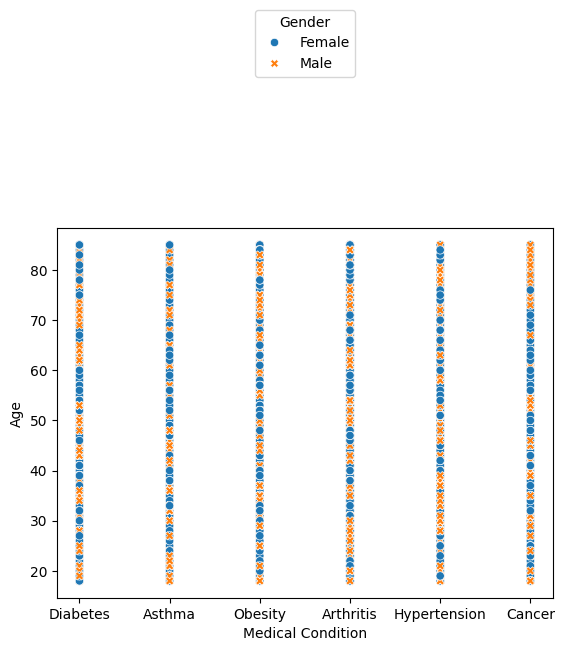

In [55]:
sns.scatterplot(data=health_care_df,x='Medical Condition',y='Age',hue='Gender',style='Gender')
plt.legend(bbox_to_anchor=(.5, 1.5),loc='center',title='Gender')
plt.show()

#### 3. Pandas DataFrame

##### 3.1 Pandas dataframe.corr()
Pandas DataFrame corr() Method Syntax: DataFrame.corr(self, method=’pearson’, min_periods=1, numeric_only = False)

###### Parameters: method : pearson: standard correlation coefficient
###### kendall: Kendall Tau correlation coefficient
###### spearman: Spearman rank correlation
###### min_periods : Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation
###### numeric_only : Whether only the numeric values are to be operated upon or not. It is set to False by default.

In [56]:
health_care_df.corr(method='pearson',numeric_only=True)

,Age,Billing Amount,Day Hospitalized
Age,1.000000,-0.009483,0.009111
Billing Amount,-0.009483,1.000000,-0.013507
Day Hospitalized,0.009111,-0.013507,1.000000


In [ ]:
# ! pip install ydata_profiling --ignore-installed scipy

In [ ]:
# ! pip install --upgrade numpy scipy pandas

In [66]:
# from ydata_profiling import ProfileReport
# ProfileReport(health_care_df)

ModuleNotFoundError: No module named 'ydata_profiling'

#### 3.2 Describe

In [64]:
health_care_df.describe()

,Age,Billing Amount,Day Hospitalized
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,15.561800
std,19.588974,14067.292709,8.612038
min,18.000000,1000.180837,1.000000
25%,35.000000,13506.523967,8.000000
50%,52.000000,25258.112566,16.000000
75%,68.000000,37733.913727,23.000000
max,85.000000,49995.902283,30.000000


In [70]:
health_care_df.describe(include='O')
# health_care_df.info()

,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,8,6,9416,8639,5,3,5,3
top,Female,AB-,Asthma,Michael Johnson,Smith PLC,Cigna,Urgent,Penicillin,Abnormal
freq,5075,1275,1708,7,19,2040,3391,2079,3456


In [71]:
health_care_df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Day Hospitalized'],
      dtype='object')

In [72]:
health_care_df.isnull().sum()

Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Medication            0
Test Results          0
Day Hospitalized      0
dtype: int64

In [73]:
health_care_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [74]:
health_care_df['Test Results'].unique()

array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)